In [1]:
import matplotlib.pylab as plt
import numpy as np

import skfda
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction.projection import FPCA

In [2]:
xlabel_font_size = 20
both_ticks_label_size = 15
legend_font_size = 15

COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

PLOTS_MEMORIA_PATH = f"C:/Users/jllav/OneDrive/Documentos/TFMs/TFM_MMA/plots_memoria"

In [3]:
dataset = skfda.datasets.fetch_growth()

dataset['data'].dataset_name = ''
heights = dataset['data'].data_matrix.squeeze()
ages = dataset['data'].grid_points[0]

# 1 = Niños 0 = Niñas
examples_heights_boys = heights[dataset['target'] == 1][:10]
examples_heights_girls = heights[dataset['target'] == 0][:10]

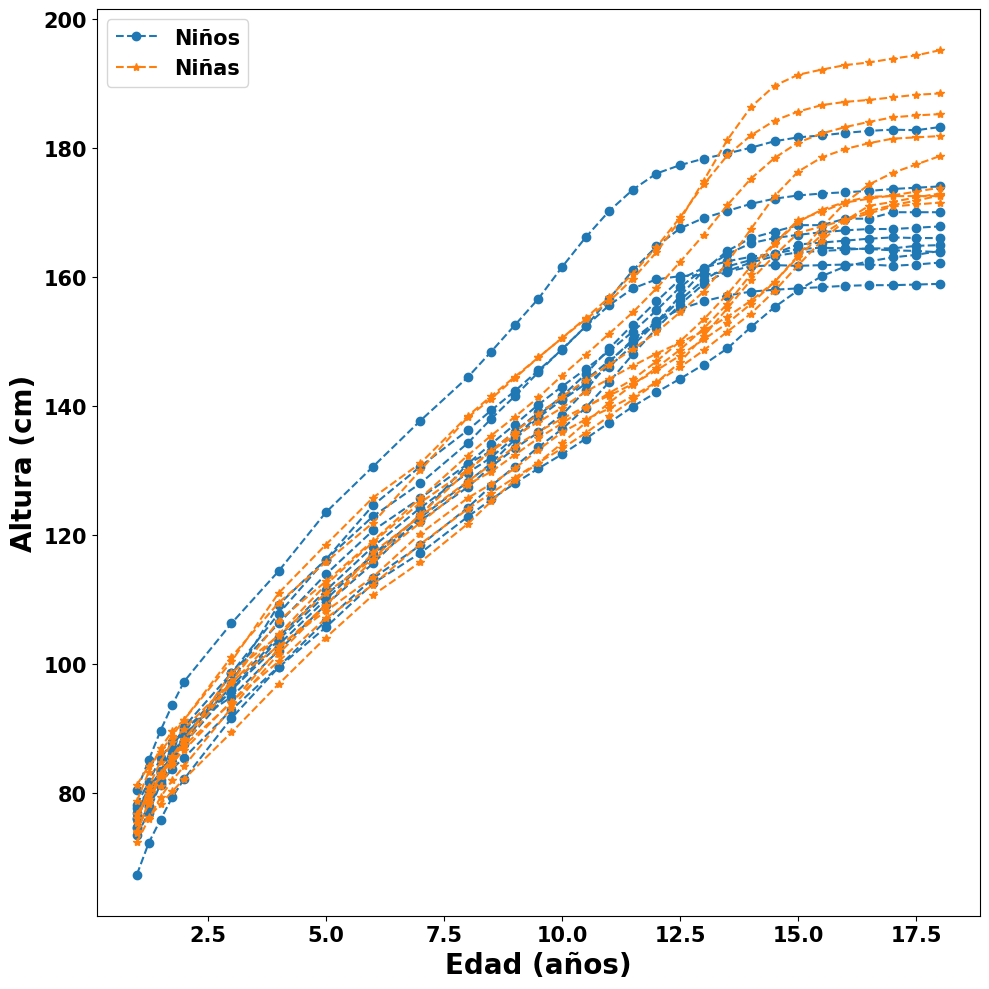

In [4]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1)
for i, example in enumerate(examples_heights_boys):
    if i == 0:
        ax.plot(ages, example, 'o--' , label='Niños', color=COLORS[0])
    else:
        ax.plot(ages, example, 'o--' , color=COLORS[0])

for i, example in enumerate(examples_heights_girls):
    if i == 0:
        ax.plot(ages, example, '*--' , label='Niñas', color=COLORS[1])
    else:
        ax.plot(ages, example, '*--' , color=COLORS[1])

ax.set_xlabel('Edad (años)', fontsize=xlabel_font_size)
ax.set_ylabel('Altura (cm)', fontsize=xlabel_font_size)
ax.tick_params(axis='both', which='major', labelsize=both_ticks_label_size)

ax.legend(fontsize=legend_font_size)
plt.tight_layout()

plt.savefig(f"{PLOTS_MEMORIA_PATH}/3_2_Berkeley_examples.pdf")

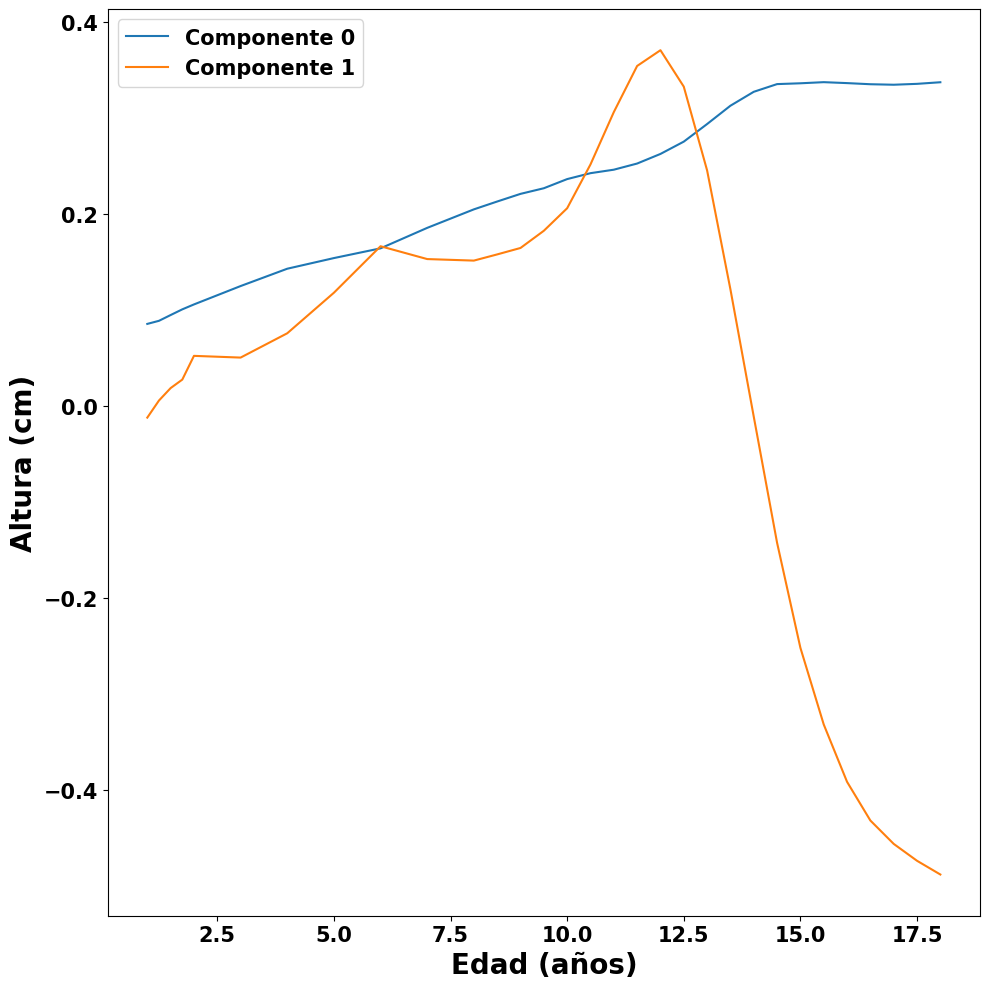

In [5]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1)

fpca = FPCA(n_components=2)
projections = fpca.fit_transform(dataset['data'])
for i, component in enumerate(fpca.components_.data_matrix.squeeze()):
    ax.plot(fpca.components_.grid_points[0],
            component, label=f"Componente {i}")

ax.set_xlabel('Edad (años)', fontsize=xlabel_font_size)
ax.set_ylabel('Altura (cm)', fontsize=xlabel_font_size)
ax.tick_params(axis='both', which='major', labelsize=both_ticks_label_size)

ax.legend(fontsize=legend_font_size)
plt.tight_layout()
plt.savefig(f"{PLOTS_MEMORIA_PATH}/3_2_first_2_components.pdf")

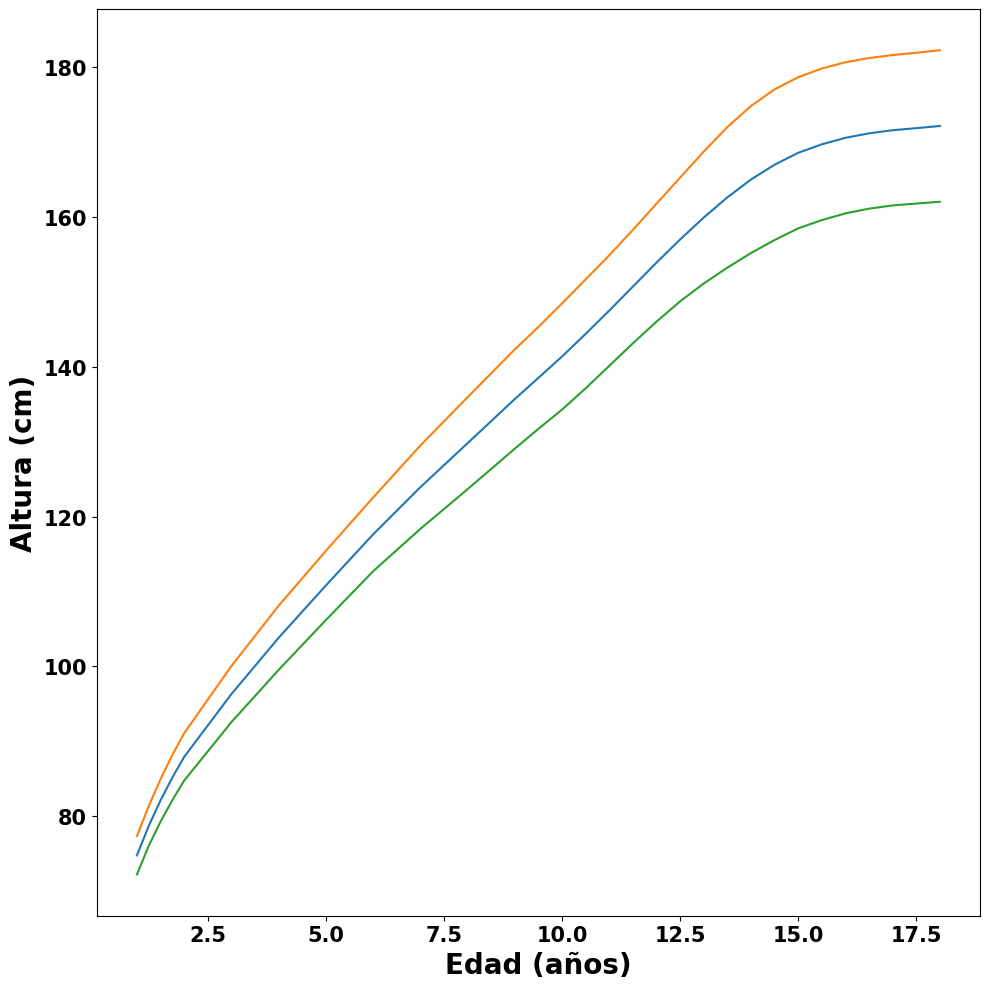

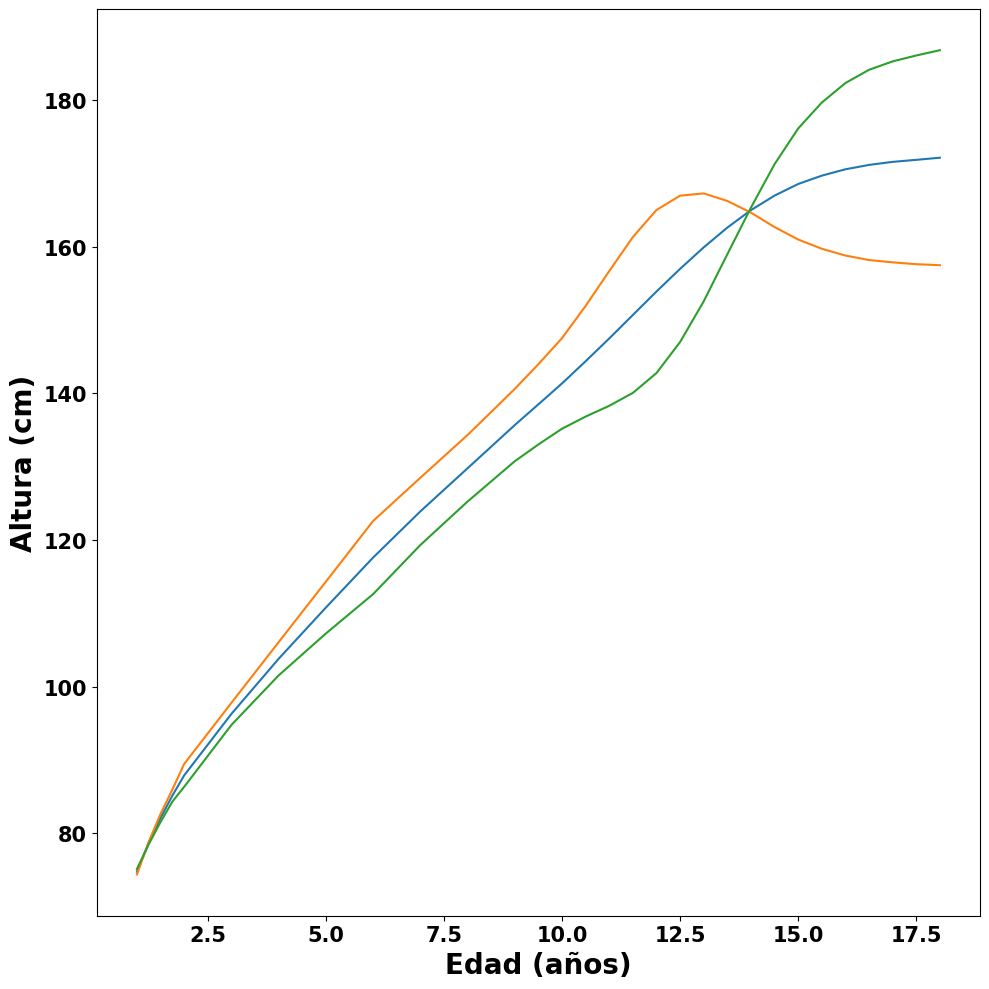

In [6]:
# 1 = Niños 0 = Niñas



mean  = dataset['data'].data_matrix.squeeze().mean(axis=0)

for i, component in enumerate(fpca.components_.data_matrix.squeeze()):
    fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1)
    ax.set_ylabel('Altura (cm)', fontsize=xlabel_font_size)
    ax.tick_params(axis='both', which='major', labelsize=both_ticks_label_size)
    ax.set_xlabel('Edad (años)', fontsize=xlabel_font_size)

    ax.plot( dataset['data'].grid_points[0], mean)
    ax.plot( dataset['data'].grid_points[0], mean + 30 * component)
    ax.plot( dataset['data'].grid_points[0], mean - 30 * component)

    plt.savefig(f"{PLOTS_MEMORIA_PATH}/3_2_perturbation_{i}_comp.pdf")
    plt.tight_layout()

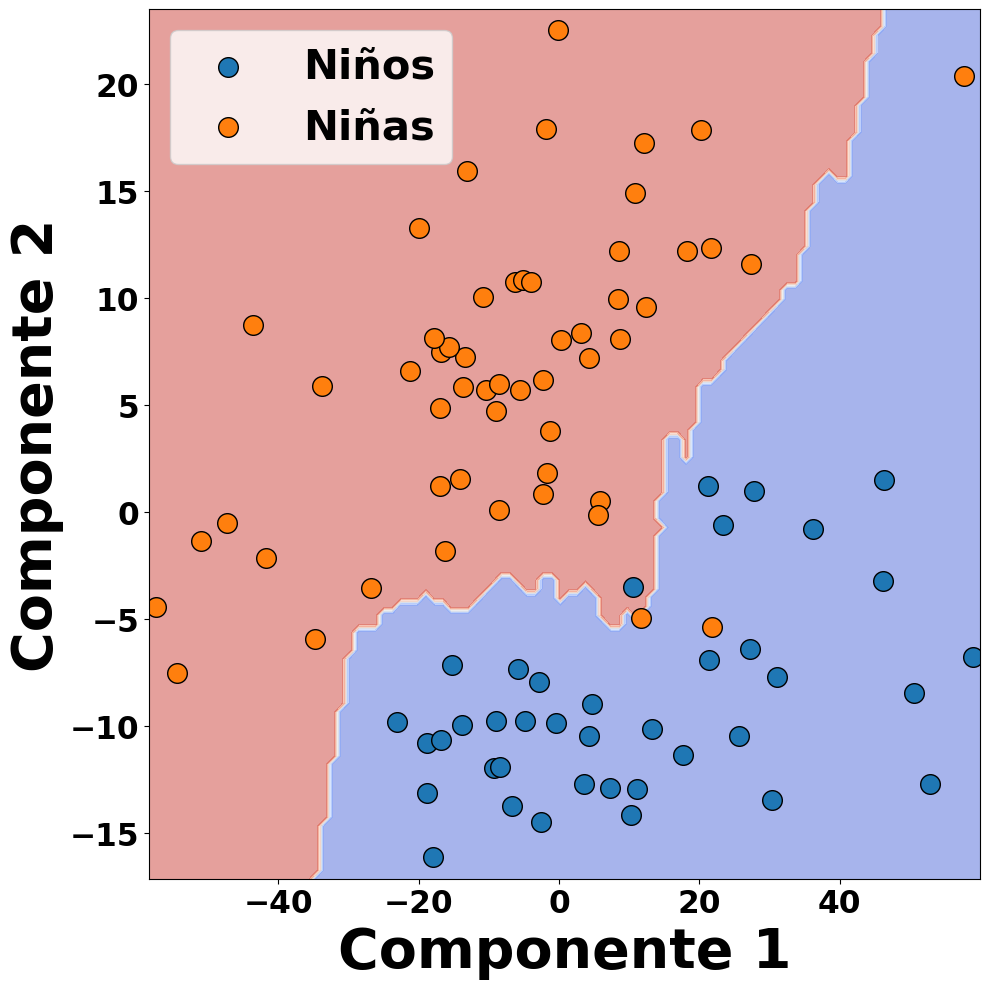

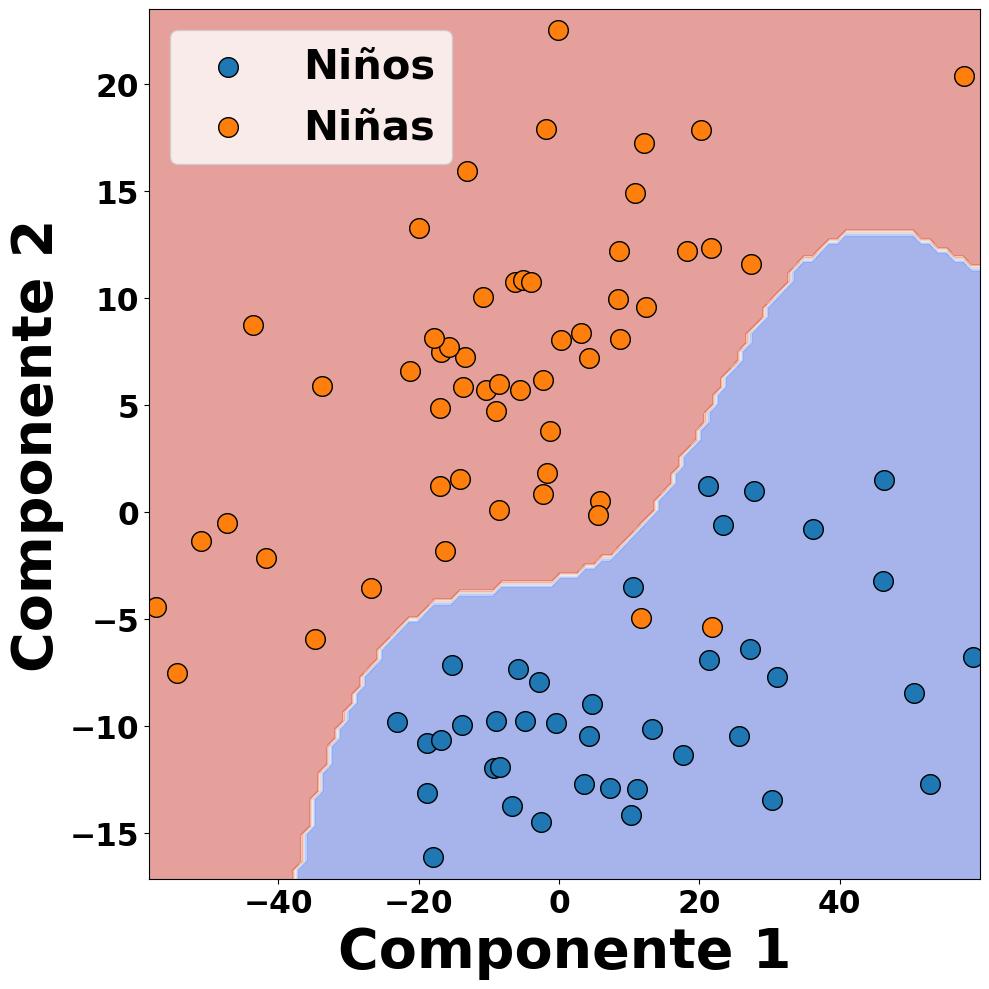

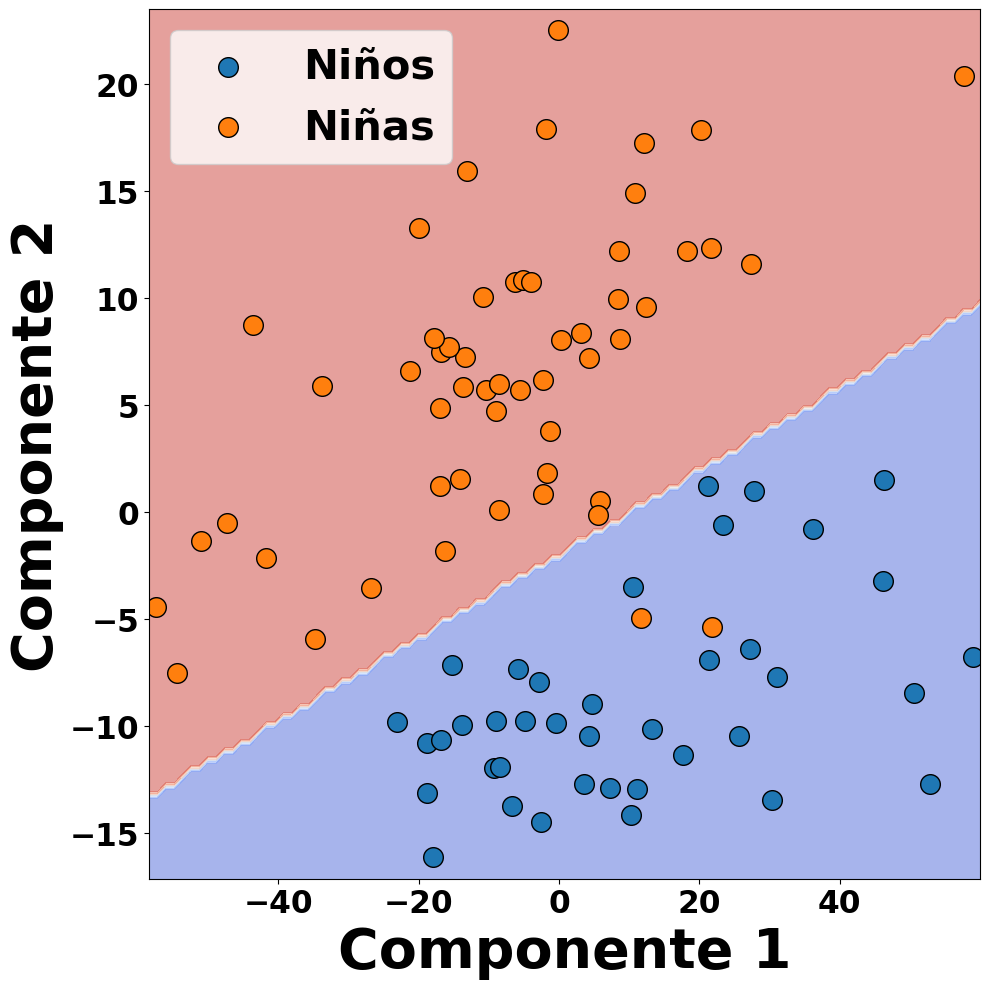

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import _safe_indexing



eps = 1.0
x0, x1 = _safe_indexing(projections, 0, axis=1), _safe_indexing(projections, 1, axis=1)

x0_min, x0_max = x0.min() - eps, x0.max() + eps
x1_min, x1_max = x1.min() - eps, x1.max() + eps

grid_resolution = 100
xx0, xx1 = np.meshgrid(
    np.linspace(x0_min, x0_max, grid_resolution),
    np.linspace(x1_min, x1_max, grid_resolution),
)

X_grid = np.c_[xx0.ravel(), xx1.ravel()]

clfs = {
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(kernel='rbf', random_state=0, class_weight='balanced'),
    'LR': LogisticRegression(penalty='l1',
                             solver='liblinear',
                             random_state=0,
                             class_weight='balanced',
                             max_iter=1000)
}
for i, (title, clf) in enumerate(clfs.items()):
    fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1, sharey=True, sharex=True)
    ax.set_xlabel('Componente 1', fontsize=xlabel_font_size*2)
    ax.set_ylabel('Componente 2', fontsize=xlabel_font_size*2)
    ax.tick_params(axis='both', which='major', labelsize=both_ticks_label_size*1.5)

    clf.fit(projections, dataset['target'])

    response = clf.predict(X_grid)
    encoder = LabelEncoder()
    encoder.classes_ = clf.classes_
    response = encoder.transform(response)
    response = response.reshape(xx0.shape)

    ax.contourf(xx0, xx1, response, alpha=0.5, cmap=plt.cm.coolwarm)

    ax.scatter(projections[dataset['target'] == 0][:, 0],
                    projections[dataset['target'] == 0][:, 1],
                    cmap=plt.cm.coolwarm,
                    label='Niños', s=200, edgecolors="k")

    ax.scatter(projections[dataset['target'] == 1][:, 0],
                    projections[dataset['target'] == 1][:, 1],
                    cmap=plt.cm.coolwarm,
                    label='Niñas', s=200, edgecolors="k")

    ax.legend(fontsize=legend_font_size*2)

    plt.tight_layout()
    plt.savefig(f"{PLOTS_MEMORIA_PATH}/3_2_first_2_comp_bd_{title}.pdf")

In [8]:
from sklearn.cross_decomposition import PLSRegression
pls_regressor = PLSRegression(n_components=2)
pls_regressor = pls_regressor.fit(dataset['data'].data_matrix.squeeze(), dataset['target'])

projections = pls_regressor.transform(dataset['data'].data_matrix.squeeze())

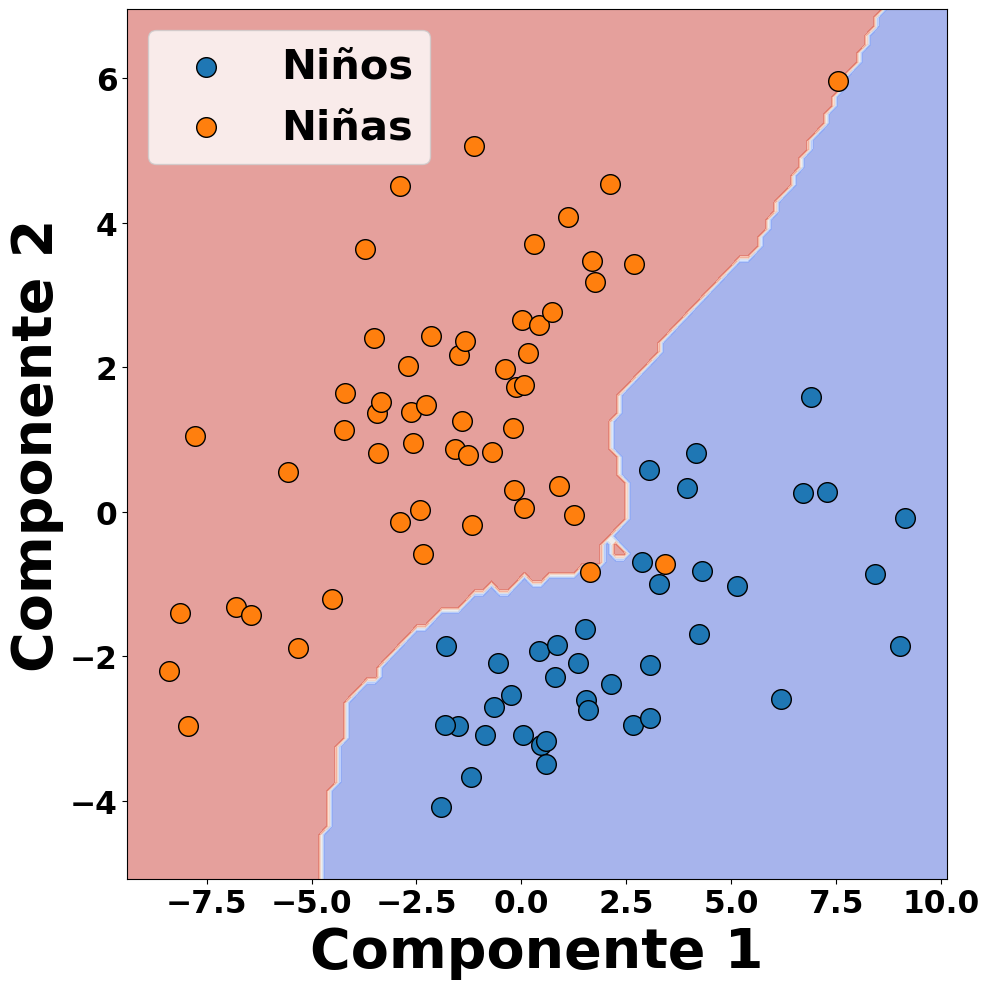

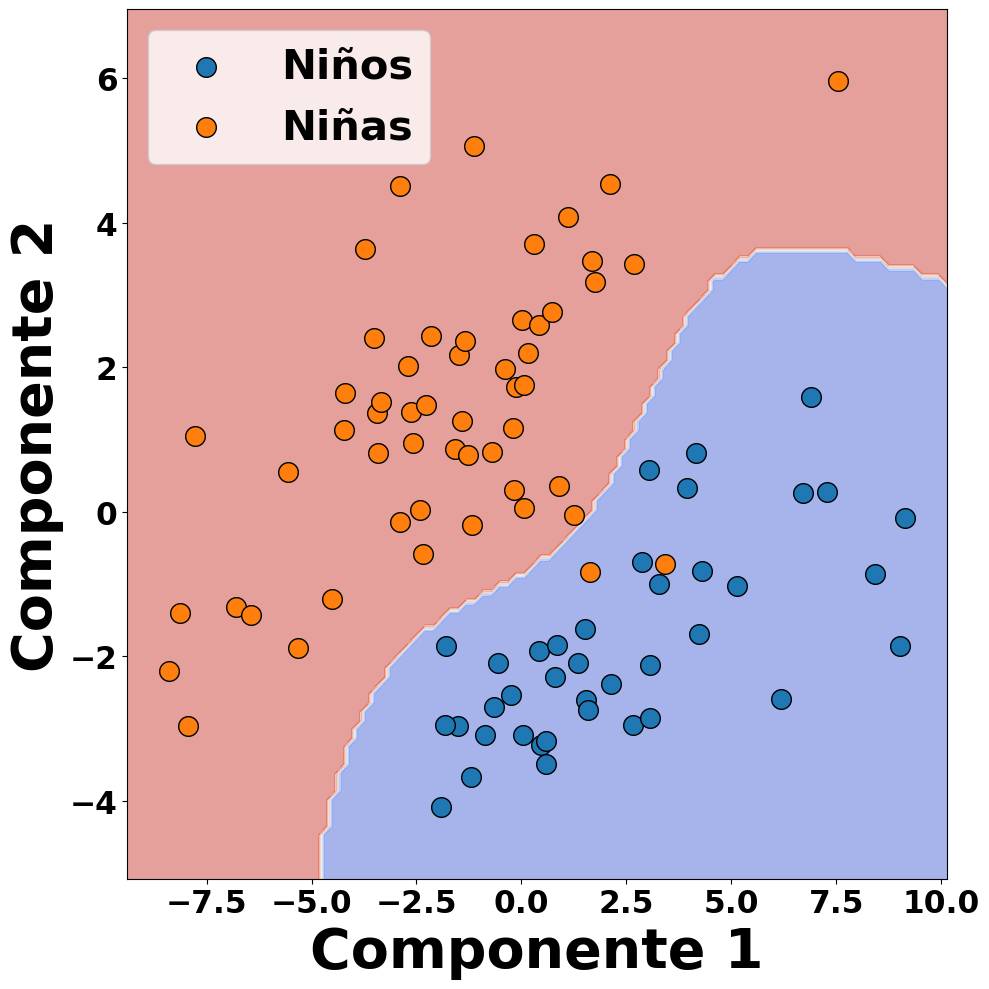

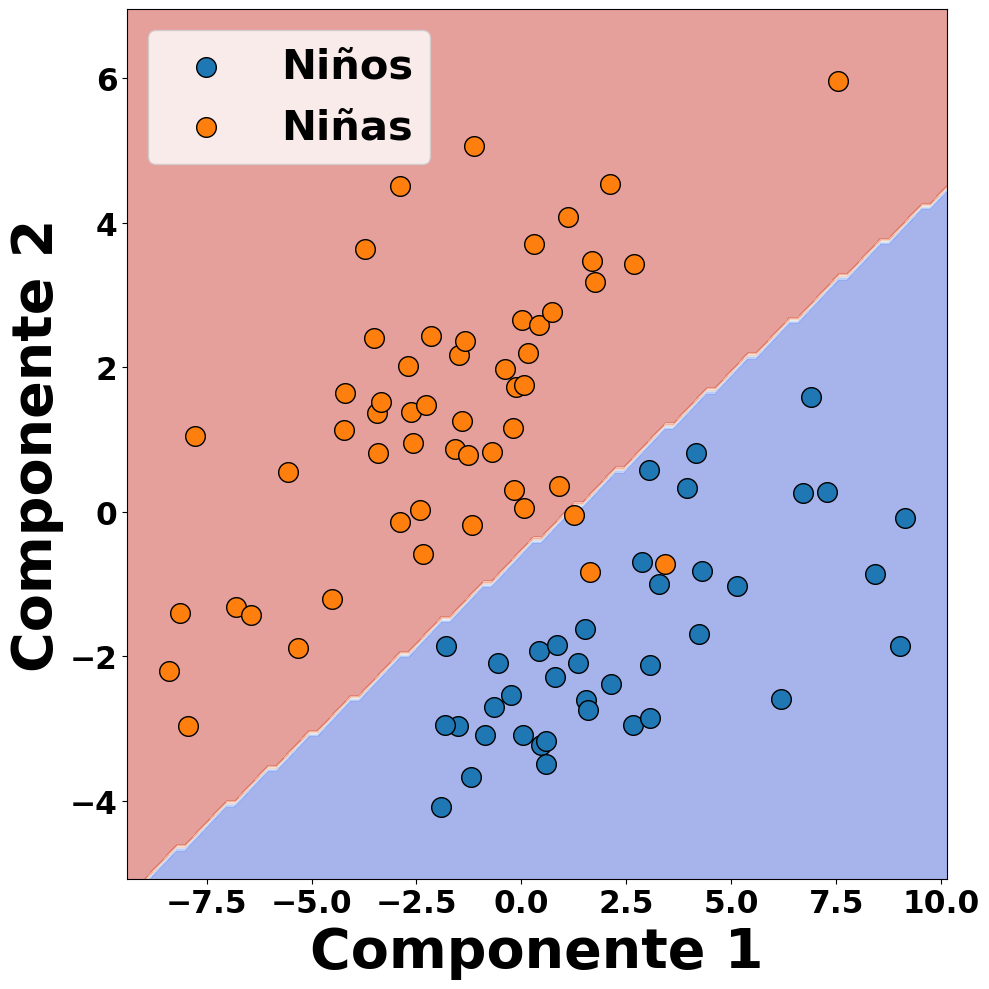

In [9]:
eps = 1.0
x0, x1 = _safe_indexing(projections, 0, axis=1), _safe_indexing(projections, 1, axis=1)

x0_min, x0_max = x0.min() - eps, x0.max() + eps
x1_min, x1_max = x1.min() - eps, x1.max() + eps

grid_resolution = 100
xx0, xx1 = np.meshgrid(
    np.linspace(x0_min, x0_max, grid_resolution),
    np.linspace(x1_min, x1_max, grid_resolution),
)

X_grid = np.c_[xx0.ravel(), xx1.ravel()]

for i, (title, clf) in enumerate(clfs.items()):
    fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1, sharey=True, sharex=True)
    ax.set_xlabel('Componente 1', fontsize=xlabel_font_size*2)
    ax.set_ylabel('Componente 2', fontsize=xlabel_font_size*2)
    ax.tick_params(axis='both', which='major', labelsize=both_ticks_label_size*1.5)

    clf.fit(projections, dataset['target'])

    response = clf.predict(X_grid)
    encoder = LabelEncoder()
    encoder.classes_ = clf.classes_
    response = encoder.transform(response)
    response = response.reshape(xx0.shape)

    ax.contourf(xx0, xx1, response, alpha=0.5, cmap=plt.cm.coolwarm)

    ax.scatter(projections[dataset['target'] == 0][:, 0],
               projections[dataset['target'] == 0][:, 1],
               cmap=plt.cm.coolwarm,
               label='Niños', s=200, edgecolors="k")

    ax.scatter(projections[dataset['target'] == 1][:, 0],
               projections[dataset['target'] == 1][:, 1],
               cmap=plt.cm.coolwarm,
               label='Niñas', s=200, edgecolors="k")

    ax.legend(fontsize=legend_font_size*2)

    plt.tight_layout()
    plt.savefig(f"{PLOTS_MEMORIA_PATH}/3_2_first_2_comp_pls_bd_{title}.pdf")